# Import data and libraries

- without seeing the ans 
- I do what i think 

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from tqdm import tqdm 

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

In [9]:
"""# Data Loading from online
wine_data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv"
wine = pd.read_csv(wine_data_path)
wine.head(1)"""

'# Data Loading from online\nwine_data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv"\nwine = pd.read_csv(wine_data_path)\nwine.head(1)'

In [4]:
df = pd.read_csv('wine-data.csv')

In [5]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [7]:
df.sample(4)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
5415,red,10.4,0.61,0.49,2.1,0.200,5.0,16.0,0.99940,3.16,0.63,8.400000,3
2505,white,7.4,0.40,0.41,14.1,0.053,37.0,194.0,0.99886,3.20,0.63,9.400000,6
4663,white,6.0,0.17,0.33,6.0,0.036,30.0,111.0,0.99362,3.32,0.58,10.133333,7
2498,white,6.8,0.21,0.36,18.1,0.046,32.0,133.0,1.00000,3.27,0.48,8.800000,5


In [24]:
df['type'].value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

In [ ]:
# i think `type` column is not use full that much
df1 = df.drop('type', axis=1).copy()

In [26]:
df1['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [ ]:
# check the null value 
df1.isnull().sum()

fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [48]:
df1 = df1.dropna()

# Train Test Split

In [49]:
X = df1.drop('quality', axis=1)
y = df1['quality']

In [50]:
print(X.shape, y.shape)

(6463, 11) (6463,)


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
print("Train : ", X_train.shape, y_train.shape)
print("Test : ", X_test.shape, y_test.shape)

Train :  (5170, 11) (5170,)
Test :  (1293, 11) (1293,)


# Before KNN

In [53]:
knn = KNeighborsClassifier()

In [56]:
# Then fit with the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [59]:
y_pred = knn.predict(X_test)
y_pred.shape

(1293,)

# Now use Standard Scalar

In [66]:
scalar = StandardScaler()

# Learn the Parameters 
X_train_scaled = scalar.fit_transform(X_train.values)
X_test_scaled = scalar.transform(X_test.values)

In [67]:
# Check the shape
print(X_train_scaled.shape, X_test_scaled.shape)

(5170, 11) (1293, 11)


# Apply PCA

In [77]:
# before Choosing the components
# Check how many columns is their
df1.shape

(6463, 12)

In [72]:
pca = PCA(n_components=None)

In [73]:
X_train_trf = pca.fit_transform(X_train_scaled)
X_test_trf = pca.transform(X_test_scaled)

In [74]:
# Check the shape
print(X_train_trf.shape, X_test_trf.shape)

(5170, 11) (1293, 11)


In [81]:
knn = KNeighborsClassifier()

knn.fit(X_train_trf, y_train)

y_pred = knn.predict(X_test_trf)
y_pred.shape

(1293,)

In [82]:
accuracy_score(y_test, y_pred)

0.5583913379737045

In [134]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [135]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Best Components

In [155]:
def best_components_with_accuracy(components:int=5, neighbor:int=5) -> str:
    """ This function take the number of components & provide the accuracy."""
    
    if components >= df1.shape[-1]:
        print("Give valid components ... ")
    else:
        # Apply the PCA on standardized features
        pca = PCA(n_components=components)
        X_train_pca = pca.fit_transform(X_train_scaled)
        X_test_pca = pca.transform(X_test_scaled)
        
        # Train on KNN algorithm
        knn_with_pca = KNeighborsClassifier(n_neighbors=neighbor)
        knn_with_pca.fit(X_train_pca, y_train)
        
        # Predict the test data
        y_pred_pca = knn_with_pca.predict(X_test_pca)
        
        # Evaluate the accuracy
        accuracy_score_pca = accuracy_score(y_test, y_pred_pca) * 100
        
        # Show 
        print(f"No of Neighbors : {neighbor}")
        print(f'KNN having Features : {components}')
        print(f"Accuracy Score is : {accuracy_score_pca}")

In [157]:
best_components_with_accuracy(10, 3)

No of Neighbors : 3
KNN having Features : 10
Accuracy Score is : 55.529775715390564


# Transform into 3D and 2D

In [ ]:
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train_scaled)
X_test_trf = pca.transform(X_test_scaled)

In [86]:
print(X_train_trf.shape, X_test_trf.shape)

(5170, 3) (1293, 3)


In [90]:
X_train_trf

array([[ 2.69273447,  1.50135826, -2.20496383],
       [ 0.58683394, -0.78733515,  2.84153562],
       [ 1.97285275, -0.20774693, -0.1674416 ],
       ...,
       [-2.55615136,  2.64091517,  2.13960805],
       [-2.65129947,  1.90196693,  1.37047937],
       [-0.6374396 ,  0.41964335,  1.1585281 ]], shape=(5170, 3))

In [96]:
y_train_str = y_train.astype(str)

df_plot_3d = pd.DataFrame(
    {
        'pc1': X_train_trf[:, 0],
        'pc2': X_train_trf[:, 1],
        'pc3': X_train_trf[:, 2],
        'label':y_train_str,
    }
)

In [104]:
fig = px.scatter_3d(
    df_plot_3d,
    x= 'pc1',
    y= 'pc2',
    z= 'pc3',
    color= 'label'
)
fig.update_traces(marker=dict(size=5))
fig.update_layout(margin = dict(l=0, r=0, b=0, t=30))
fig.show(remind='iframe')

In [100]:
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train_scaled)
X_test_trf = pca.transform(X_test_scaled)

In [101]:
# Check the shape
print(X_train_trf.shape, X_test_trf.shape)

(5170, 2) (1293, 2)


In [103]:
# Plot the points see the graph
y_train_str = y_train.astype(str)

fig = px.scatter(
    x= X_train_trf[:, 0],
    y= X_train_trf[:, 1],
    color=y_train_str
)

fig.show(remind='iframe')

In [105]:
# No components

pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train_scaled)
X_test_trf = pca.transform(X_test_scaled)

In [106]:
print(X_train_trf.shape, X_test_trf.shape)

(5170, 11) (1293, 11)


In [108]:
# Egien values
pca.explained_variance_

array([3.02507544, 2.48260719, 1.55255839, 0.99064339, 0.72282547,
       0.60460104, 0.51839848, 0.502692  , 0.34090317, 0.22844185,
       0.03338164])

In [109]:
# Egien Vectors
pca.components_.shape

(11, 11)

In [107]:
pca.explained_variance_ratio_

array([0.27495367, 0.22564791, 0.14111437, 0.09004107, 0.0656987 ,
       0.0549531 , 0.04711802, 0.04569043, 0.0309852 , 0.02076342,
       0.00303411])

In [110]:
variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)
variance_ratio_cumsum

array([0.27495367, 0.50060157, 0.64171595, 0.73175702, 0.79745571,
       0.85240881, 0.89952683, 0.94521727, 0.97620247, 0.99696589,
       1.        ])

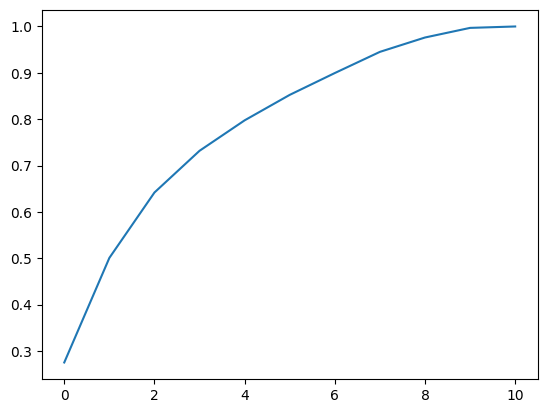

In [111]:
plt.plot(variance_ratio_cumsum)